# Import necessory libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Data Collection

In [28]:
path = r"ad_click_dataset.csv"
df = pd.read_csv(path)
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [29]:
df.tail()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
9995,8510,User8510,NaN,NaN,Mobile,Top,Education,NaN,0
9996,7843,User7843,NaN,Female,Desktop,Bottom,Entertainment,NaN,0
9997,3914,User3914,NaN,Male,Mobile,Side,NaN,Morning,0
9998,7924,User7924,NaN,NaN,Desktop,NaN,Shopping,Morning,1
9999,3056,User3056,44.0,Male,Tablet,Top,Social Media,Morning,0


In [30]:
def generate_summary(df):
    summary = pd.DataFrame()
    summary["nunique"] = df.nunique()
    summary["missing_values"] = df.isnull().sum()
    summary["missing_percentage"] = (df.isnull().mean() * 100).round(2)
    summary["dtype"] = df.dtypes  # dtype last
    num_df = df.select_dtypes(include=["number"])
    summary["mean"] = num_df.mean()
    summary["median"] = num_df.median()
    summary["mode"] = df.mode().iloc[0]

    return summary

summary_df = generate_summary(df)

In [31]:
def highlight_cells(s):
    if s.name == "missing_percentage" or s.name == "missing_values":
        return ["background-color: red; color: white" if v > 50 
                else "background-color: lightgreen; color: black" if v < 30 
                else "" for v in s]
    elif s.name == "nunique":
        return ["background-color: yellow; color: black" if v < 51 
                else "background-color: orange; color: black" if v < 500 
                else "background-color: red; color: black" 
                for v in s]
    elif s.name == "dtype":
        return ["background-color: lightgrey; color: black" if v == "object" 
                else "background-color: lightblue; color: black" for v in s]
    return [""] * len(s)

styled_summary = summary_df.style.apply(highlight_cells, axis=0)

styled_summary

,nunique,missing_values,missing_percentage,dtype,mean,median,mode
id,4000,0,0.000000,int64,5060.211400,5218.000000,1171
full_name,4000,0,0.000000,object,nan,nan,User1171
age,47,4766,47.660000,float64,40.197363,39.500000,26.000000
gender,3,4693,46.930000,object,nan,nan,Female
device_type,3,2000,20.000000,object,nan,nan,Desktop
ad_position,3,2000,20.000000,object,nan,nan,Bottom
browsing_history,5,4782,47.820000,object,nan,nan,Entertainment
time_of_day,4,2000,20.000000,object,nan,nan,Morning
click,2,0,0.000000,int64,0.650000,1.000000,1


# Data preprocessing - 1

In [32]:
# X and Y separation
x=df.drop(['id','full_name','click'],axis=1)
y= df['click']

In [33]:
x.nunique()

age                 47
gender               3
device_type          3
ad_position          3
browsing_history     5
time_of_day          4
dtype: int64

In [34]:

nan = x.isna().sum().index
for i in nan:
 print(x[i].unique())

[22. nan 41. 34. 39. 26. 40. 47. 19. 56. 24. 52. 42. 36. 43. 62. 45. 37.
 31. 58. 59. 48. 38. 49. 30. 46. 54. 44. 27. 57. 28. 51. 25. 61. 32. 64.
 23. 55. 21. 20. 35. 53. 33. 29. 63. 50. 18. 60.]
[nan 'Male' 'Non-Binary' 'Female']
['Desktop' nan 'Mobile' 'Tablet']
['Top' 'Side' nan 'Bottom']
['Shopping' nan 'Education' 'Entertainment' 'Social Media' 'News']
['Afternoon' nan 'Night' 'Evening' 'Morning']


In [35]:
num = x.select_dtypes(include='number').columns

In [36]:
# correlation_with_target = num.corrwith(y)
# correlation_with_target.sort_values().plot(kind="bar", figsize=(10,5), color="skyblue")
# plt.title("Feature Correlation with Churn")
# plt.ylabel("Correlation")
# plt.show()


In [37]:
obj = x.select_dtypes(include='object').columns
for i in obj:
  x[i]=x[i].fillna(x[i].mode()[0])

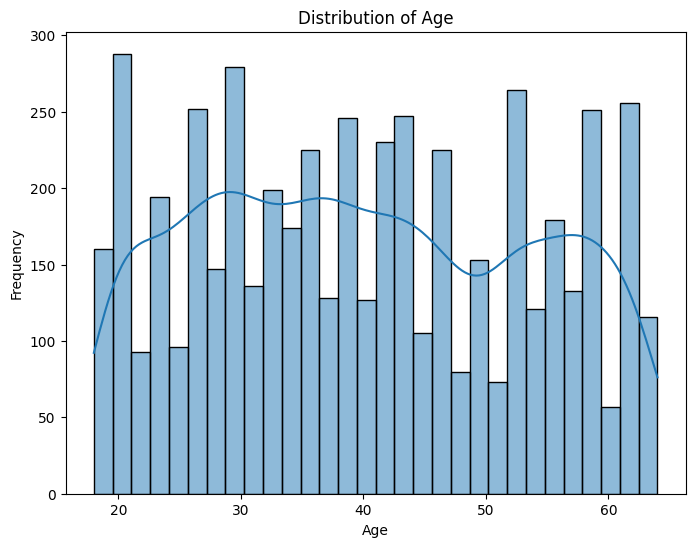

In [38]:
# Distribution of age before filling
plt.figure(figsize=(8,6))
sns.histplot(x['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [39]:
df['age'].mode()[0] , df['age'].median(),df['age'].mean()

(26.0, 39.5, 40.197363393198316)

In [40]:
x['age'] = x['age'].fillna(x['age'].median())

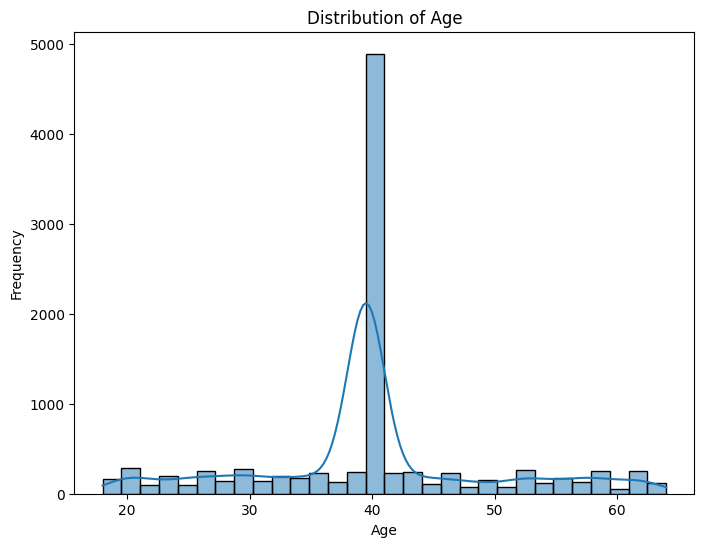

In [41]:
# Distribution of age after filling missing values
plt.figure(figsize=(8,6))
sns.histplot(x['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [42]:
x.head()

,age,gender,device_type,ad_position,browsing_history,time_of_day
0,22.0,Female,Desktop,Top,Shopping,Afternoon
1,39.5,Male,Desktop,Top,Entertainment,Morning
2,41.0,Non-Binary,Desktop,Side,Education,Night
3,34.0,Male,Desktop,Bottom,Entertainment,Evening
4,39.0,Non-Binary,Desktop,Bottom,Social Media,Morning


In [43]:
x.isna().sum()

age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
dtype: int64

# Visualisation

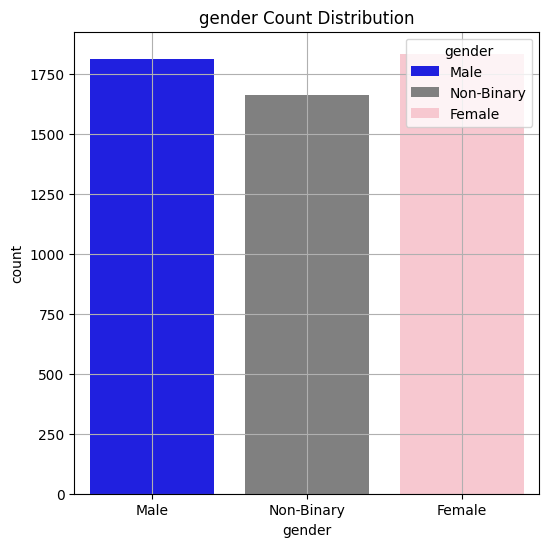

Stats of gender
     Category  Count  Percentage
0      Female   1834   34.558131
1        Male   1810   34.105898
2  Non-Binary   1663   31.335971
----------------------------------------------------------------------------------------------------


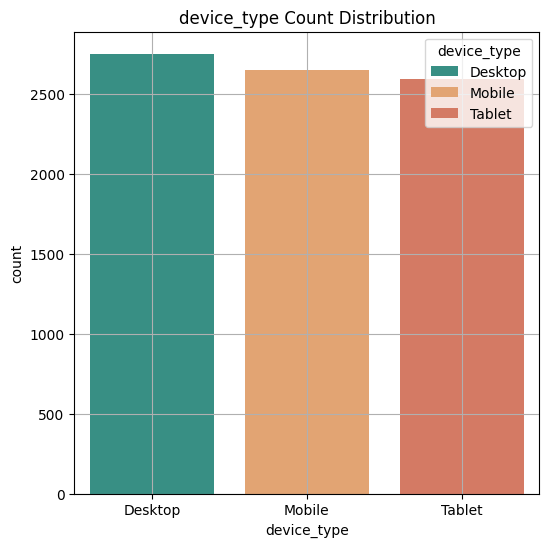

Stats of device_type
  Category  Count  Percentage
0  Desktop   2754     34.4250
1   Mobile   2649     33.1125
2   Tablet   2597     32.4625
----------------------------------------------------------------------------------------------------


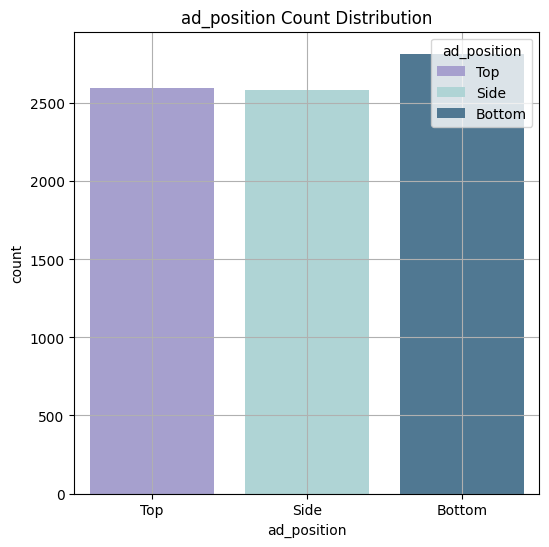

Stats of ad_position
  Category  Count  Percentage
0   Bottom   2817     35.2125
1      Top   2597     32.4625
2     Side   2586     32.3250
----------------------------------------------------------------------------------------------------


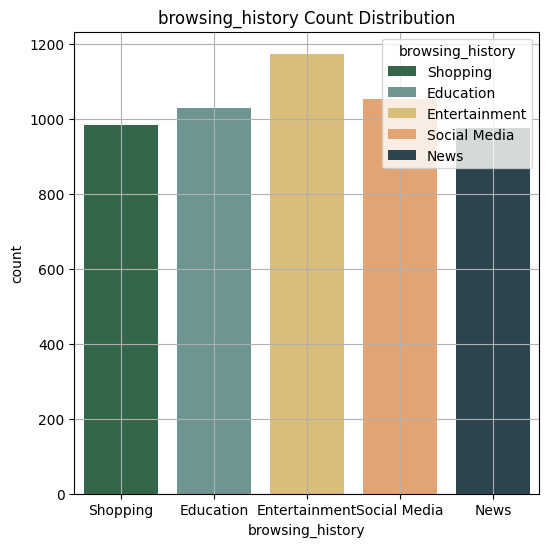

Stats of browsing_history
        Category  Count  Percentage
0  Entertainment   1175   22.518206
1   Social Media   1054   20.199310
2      Education   1029   19.720199
3       Shopping    984   18.857800
4           News    976   18.704484
----------------------------------------------------------------------------------------------------


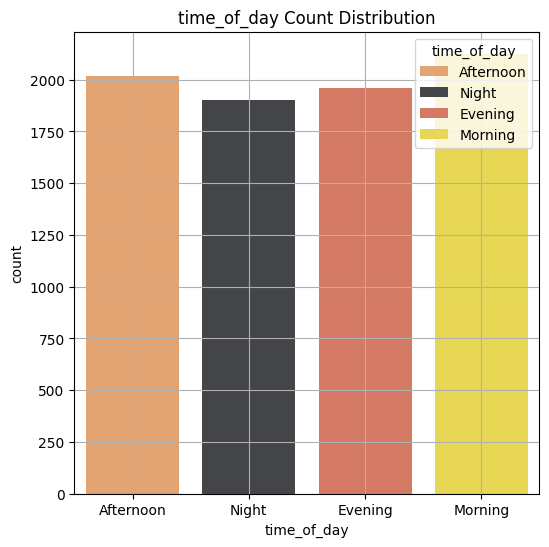

Stats of time_of_day
    Category  Count  Percentage
0    Morning   2126      26.575
1  Afternoon   2016      25.200
2    Evening   1958      24.475
3      Night   1900      23.750
----------------------------------------------------------------------------------------------------


In [44]:
plts = [
    ['blue', 'gray', 'pink'],
    ['#2A9D8F', '#F4A261', '#E76F51'],
    ['#a098d6', '#A8DADC', '#457B9D'],
    ['#2C6E49', '#679c98', '#E9C46A', '#F4A261', '#264653'],
    ['#F4A261', '#42454a', '#E76F51', '#FFEB3B']
]


j = 0
for feature in obj:
    plt.figure(figsize=(6, 6))
    sns.countplot(x=feature, data=df, hue=feature, palette=plts[j % len(plts)])  # Use theme colors
    plt.title(f"{feature} Count Distribution")
    plt.grid()
    plt.show()

    # Get counts and percentages
    counts = df[feature].value_counts()
    percentages = df[feature].value_counts(normalize=True) * 100

    # Store stats
    stats = pd.DataFrame({"Category": counts.index, "Count": counts.values, "Percentage": percentages.values})
    print(f"Stats of {feature}")
    print(stats)
    print("-" * 100)

    j += 1 

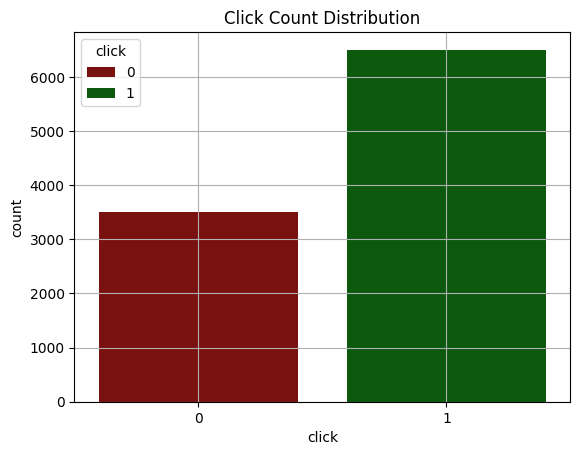

   Category  Count  Percentage
0         1   6500        65.0
1         0   3500        35.0


In [45]:
sns.countplot(x=df['click'],data=df,hue=df['click'],palette=['darkred','darkgreen'])
plt.title('Click Count Distribution')
plt.grid()
plt.show()
counts = df['click'].value_counts()
percentages = df['click'].value_counts(normalize=True) * 100
stats = pd.DataFrame({"Category": counts.index, "Count": counts.values, "Percentage": percentages.values})
print(stats)

# Visualisation and Preprocessing - II

### get_dummies encoding

In [46]:
dum_x = pd.get_dummies(x[obj],dtype=int,drop_first=True)
x = pd.concat([x,dum_x],axis=1)
x.drop(obj,axis=1,inplace=True)

In [47]:
x.head()

,age,gender_Male,gender_Non-Binary,device_type_Mobile,device_type_Tablet,ad_position_Side,ad_position_Top,browsing_history_Entertainment,browsing_history_News,browsing_history_Shopping,browsing_history_Social Media,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,22.0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,39.5,1,0,0,0,0,1,1,0,0,0,0,1,0
2,41.0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,34.0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,39.0,0,1,0,0,0,0,0,0,0,1,0,1,0


### Outlier_check

Column: age
Lower Bound: 35.0, Upper Bound: 43.0


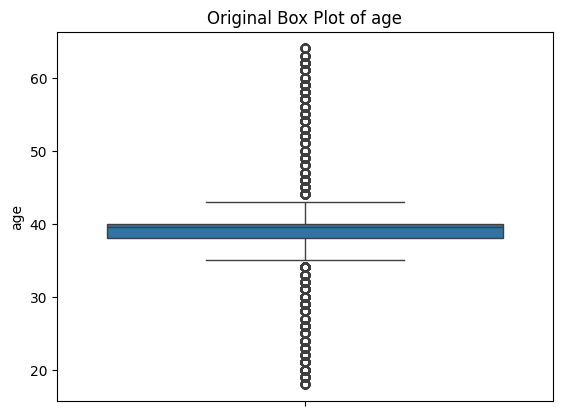

In [48]:
# outliers cleaning
def outliers_cleaning(clms):
  for column in clms:
    Q1 = np.percentile(x[column], 25)
    Q3 = np.percentile(x[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Column: {column}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    sns.boxplot(y=x[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
outliers_cleaning(num)

### Train Test Splitting

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Scaling

In [50]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Model creation And Evaluation

In [51]:
knn = KNeighborsClassifier()
nb = BernoulliNB()
svm = SVC()
tree = DecisionTreeClassifier()
rfc = RandomForestClassifier()
models = [knn,nb,svm,tree,rfc]

----------------------------------------------------------------------------------------------------
Training Model: Logistic Regression
Accuracy: 0.6465 | Precision: 0.5664 | Recall: 0.6465 | F1 Score: 0.5130

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.01      0.01       705
           1       0.65      0.99      0.78      1295

    accuracy                           0.65      2000
   macro avg       0.53      0.50      0.40      2000
weighted avg       0.57      0.65      0.51      2000



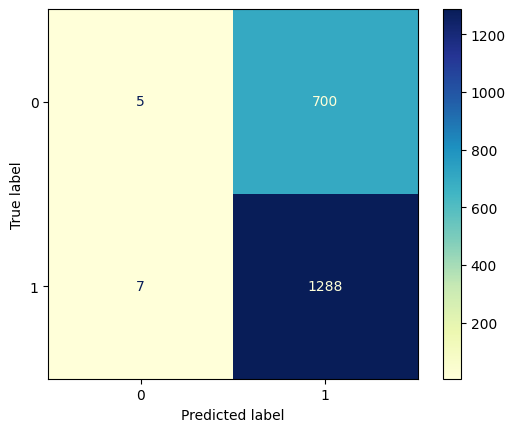

----------------------------------------------------------------------------------------------------
Training Model: K-Nearest Neighbors
Accuracy: 0.6715 | Precision: 0.6521 | Recall: 0.6715 | F1 Score: 0.6502

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.35      0.43       705
           1       0.71      0.84      0.77      1295

    accuracy                           0.67      2000
   macro avg       0.63      0.60      0.60      2000
weighted avg       0.65      0.67      0.65      2000



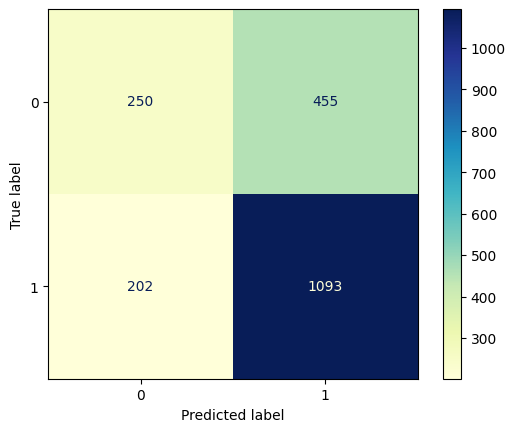

----------------------------------------------------------------------------------------------------
Training Model: Decision Tree
Accuracy: 0.7305 | Precision: 0.7217 | Recall: 0.7305 | F1 Score: 0.7175

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.47      0.55       705
           1       0.75      0.87      0.81      1295

    accuracy                           0.73      2000
   macro avg       0.71      0.67      0.68      2000
weighted avg       0.72      0.73      0.72      2000



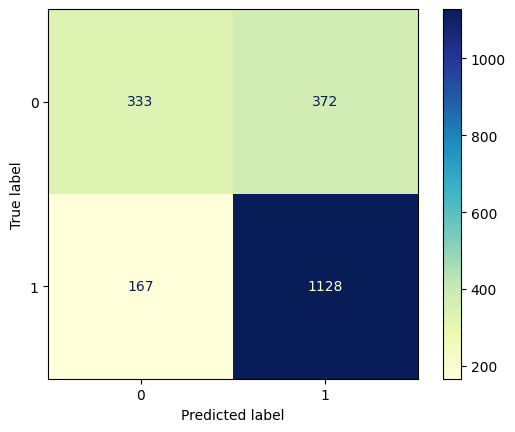

----------------------------------------------------------------------------------------------------
Training Model: Random Forest
Accuracy: 0.7205 | Precision: 0.7110 | Recall: 0.7205 | F1 Score: 0.7020

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.42      0.52       705
           1       0.74      0.88      0.80      1295

    accuracy                           0.72      2000
   macro avg       0.70      0.65      0.66      2000
weighted avg       0.71      0.72      0.70      2000



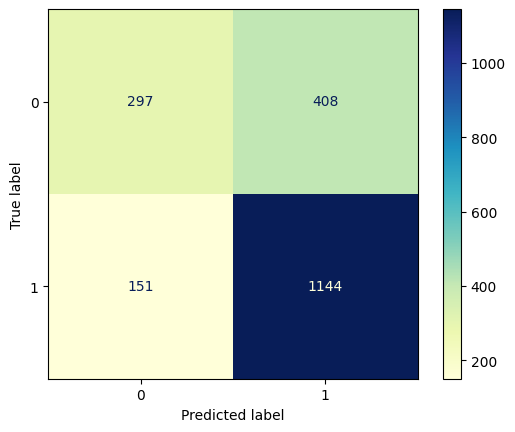

----------------------------------------------------------------------------------------------------
Training Model: AdaBoost


c:\Users\Muhammed Favas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.6550 | Precision: 0.6431 | Recall: 0.6550 | F1 Score: 0.5451

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.06      0.10       705
           1       0.66      0.98      0.79      1295

    accuracy                           0.66      2000
   macro avg       0.64      0.52      0.44      2000
weighted avg       0.64      0.66      0.55      2000



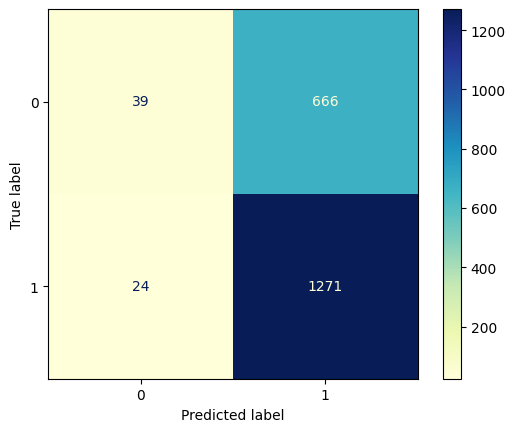

----------------------------------------------------------------------------------------------------
Training Model: XGBoost
Accuracy: 0.7370 | Precision: 0.7437 | Recall: 0.7370 | F1 Score: 0.7067

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.36      0.49       705
           1       0.73      0.94      0.82      1295

    accuracy                           0.74      2000
   macro avg       0.75      0.65      0.66      2000
weighted avg       0.74      0.74      0.71      2000



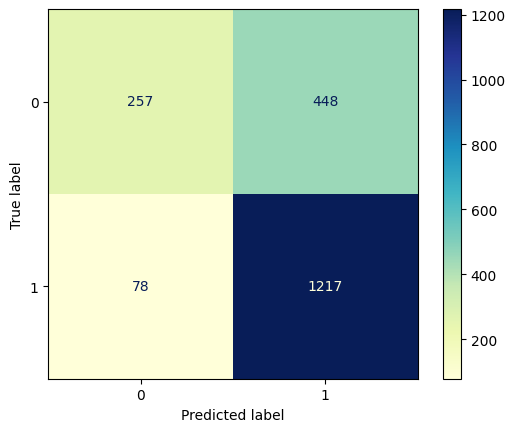


Model Performance Summary:

                 Model  Accuracy  Precision  Recall  F1 Score
5              XGBoost    0.7370   0.743703  0.7370  0.706654
2        Decision Tree    0.7305   0.721685  0.7305  0.717459
3        Random Forest    0.7205   0.710970  0.7205  0.701965
1  K-Nearest Neighbors    0.6715   0.652149  0.6715  0.650200
4             AdaBoost    0.6550   0.643084  0.6550  0.545066
0  Logistic Regression    0.6465   0.566382  0.6465  0.512976


In [52]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss")
}

# Function to train and evaluate models
def evaluate_models(models, x_train, y_train, x_test, y_test):
    results = []
    
    for name, model in models.items():
        print("-" * 100)
        print(f"Training Model: {name}")

        # Train model
        model.fit(x_train, y_train)

        # Predictions
        y_pred = model.predict(x_test)

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted', zero_division=1)
        rec = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Store results
        results.append({"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1 Score": f1})

        # Print metrics
        print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1 Score: {f1:.4f}")
        print("\nClassification Report:\n", classification_report(y_test, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
        cmd.plot(cmap='YlGnBu')
        plt.show()

    # Convert results to DataFrame for better readability
    results_df = pd.DataFrame(results)
    return results_df


# Run evaluation
results_df = evaluate_models(models, x_train, y_train, x_test, y_test)

# Display summary results
print("\nModel Performance Summary:\n")
print(results_df.sort_values(by="Accuracy", ascending=False))

In [65]:
results_df["Composite"] = results_df[["Precision", "Recall", "F1 Score"]].mean(axis=1)
best_models = results_df.sort_values(by="Composite", ascending=False)

print("Best models based on combined Precision, Recall, and F1 Score:")
best_models


Best models based on combined Precision, Recall, and F1 Score:


,Model,Accuracy,Precision,Recall,F1 Score,Composite
5,XGBoost,0.7370,0.743703,0.7370,0.706654,0.729119
2,Decision Tree,0.7305,0.721685,0.7305,0.717459,0.723215
3,Random Forest,0.7205,0.710970,0.7205,0.701965,0.711145
1,K-Nearest Neighbors,0.6715,0.652149,0.6715,0.650200,0.657950
4,AdaBoost,0.6550,0.643084,0.6550,0.545066,0.614383
0,Logistic Regression,0.6465,0.566382,0.6465,0.512976,0.575286


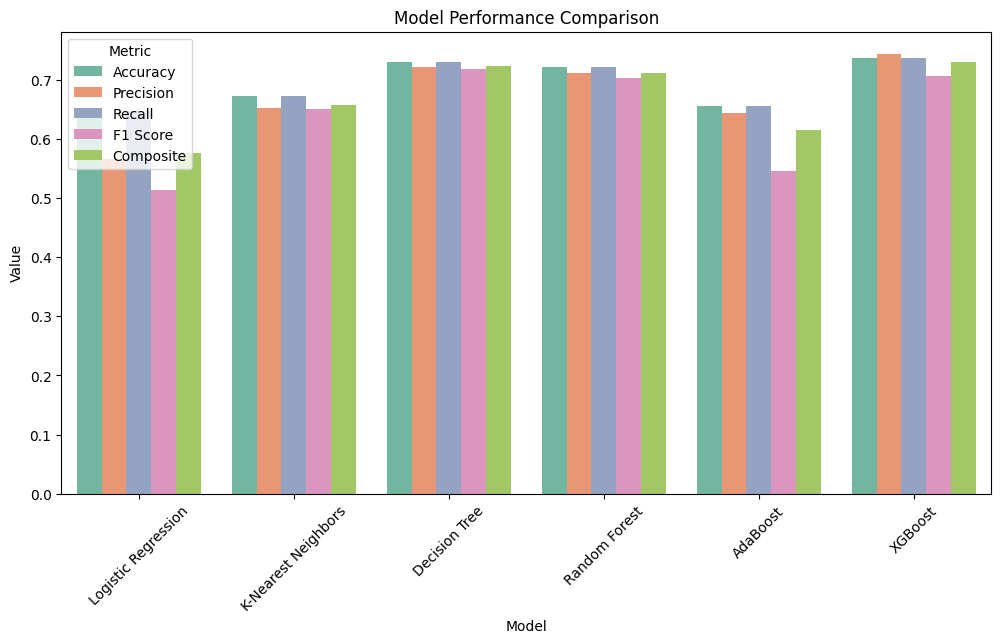

In [66]:
plt.figure(figsize=(12, 6))
df_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Value")
sns.barplot(x="Model", y="Value", hue="Metric", data=df_melted, palette="Set2")
plt.xticks(rotation=45)
plt.title("Model Performance Comparison")
plt.show()


# HyperParameter tuning:

In [53]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier()
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'sqrt', 'log2']
# }
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)


# grid_search.fit(x_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Accuracy:", grid_search.best_score_)


```
 Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
 Best Accuracy: 0.72325
```

In [54]:
model = DecisionTreeClassifier(criterion= 'gini', max_depth= 20, max_features= None, min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.729

In [55]:
# Fitting 5 folds for each of 24 candidates, totalling 120 fits
# Best Parameters: {'bootstrap': True, 'max_features': None, 'n_estimators': 500}
# Best Cross-Validation Score: 0.7461249999999999

In [56]:
# model = RandomForestClassifier()

# # Define the parameter grid for GridSearchCV
# param_grid = {
#     'max_depth': [30, 20, None],
#     'max_features': [None, 'log2'],
#     'min_samples_split': [5, 10],
#     'n_estimators': [200, 350]
# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)


# grid_search.fit(x_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Accuracy:", grid_search.best_score_)

In [57]:
# results_df = pd.DataFrame(grid_search.cv_results_)
# results_df = results_df[['mean_test_score', 'std_test_score', 'params']]
# results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# # Display the top results
# results_df.head(2)

In [58]:
model = RandomForestClassifier(max_depth= 20, max_features= None, min_samples_split= 5, n_estimators= 350)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7515

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# # Initialize the XGBoost model
# model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],  
#     'learning_rate': [0.01, 0.1, 0.2],  
#     'max_depth': [3, 6, 10],  
#     'min_child_weight': [1, 3, 5],  
#     'subsample': [0.7, 0.8, 1.0],  
#     'colsample_bytree': [0.7, 0.8, 1.0],  
#     'gamma': [0, 0.1, 0.2]  
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
#                            scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# # Fit GridSearchCV to the training data
# grid_search.fit(x_train, y_train)

# # Print best parameters and accuracy
# print("Best Parameters:", grid_search.best_params_)
# print("Best Accuracy:", grid_search.best_score_)


# test sample


In [59]:
x_test[:3],y_test[:3]

(array([[ 0.43713476, -0.46633754, -0.44955943, -0.59448204, -0.59255643,
         -0.58947595,  1.6925526 , -1.21113652, -0.32564053,  3.02740553,
         -0.34320079, -0.50136682,  1.20238731, -0.48136961],
        [-0.03690248, -0.46633754, -0.44955943, -0.59448204, -0.59255643,
         -0.58947595,  1.6925526 ,  0.82567075, -0.32564053, -0.33031584,
         -0.34320079, -0.50136682,  1.20238731, -0.48136961],
        [ 1.80657569, -0.46633754, -0.44955943, -0.59448204, -0.59255643,
         -0.58947595, -0.59082359,  0.82567075, -0.32564053, -0.33031584,
         -0.34320079, -0.50136682, -0.83167877, -0.48136961]]),
 6252    1
 4684    1
 1731    0
 Name: click, dtype: int64)

In [60]:
model.predict([[0.56521739, 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        ]])

array([1], dtype=int64)

In [61]:
x_test[:3],y_test[:3]

(array([[ 0.43713476, -0.46633754, -0.44955943, -0.59448204, -0.59255643,
         -0.58947595,  1.6925526 , -1.21113652, -0.32564053,  3.02740553,
         -0.34320079, -0.50136682,  1.20238731, -0.48136961],
        [-0.03690248, -0.46633754, -0.44955943, -0.59448204, -0.59255643,
         -0.58947595,  1.6925526 ,  0.82567075, -0.32564053, -0.33031584,
         -0.34320079, -0.50136682,  1.20238731, -0.48136961],
        [ 1.80657569, -0.46633754, -0.44955943, -0.59448204, -0.59255643,
         -0.58947595, -0.59082359,  0.82567075, -0.32564053, -0.33031584,
         -0.34320079, -0.50136682, -0.83167877, -0.48136961]]),
 6252    1
 4684    1
 1731    0
 Name: click, dtype: int64)

# To Pickle

In [62]:
import pickle

# Save model
with open('ad_click.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [63]:
with open("feature_columns.pkl", "wb") as columns_file:
    pickle.dump(x.columns.tolist(), columns_file)


In [64]:
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)
